# Data Import



> The below code is used to print every output in the 
cell



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



> Importing all the libraries needed for the exploration, visualization and modelling.



In [2]:
#File import
from google.colab import files

#pandas and numpy libraries import
import pandas as pd
import numpy as np

#Visualization libraries import
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#sklearn and metrics import
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#statisticsmodel package import
import statsmodels.api as sm

#neural networks packages import
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




> The dataset is imported as a pandas dataframe.



In [3]:
dataset = files.upload()

Saving aug_train.csv to aug_train.csv


In [4]:
hrdf = pd.read_csv('aug_train.csv',encoding='ISO-8859-1')



> Basic characteristcs such as column information, datatype information, shape and size are printed from the dataframe.



In [5]:
hrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
hrdf.size

268212

In [7]:
hrdf.shape

(19158, 14)



> Entire dataframe is checked for missing values and the count of missing values for every variable.


In [8]:
hrdf.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64



> Statistical measures for every numeric variable is printed



In [9]:
hrdf.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000




> A glimpse of our dataframe before analysis



In [10]:
hrdf.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0




> Correlation matrix for the dataframe is printed.



In [11]:
hrdf.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


# Data exploration & Visualization



> Heat Map



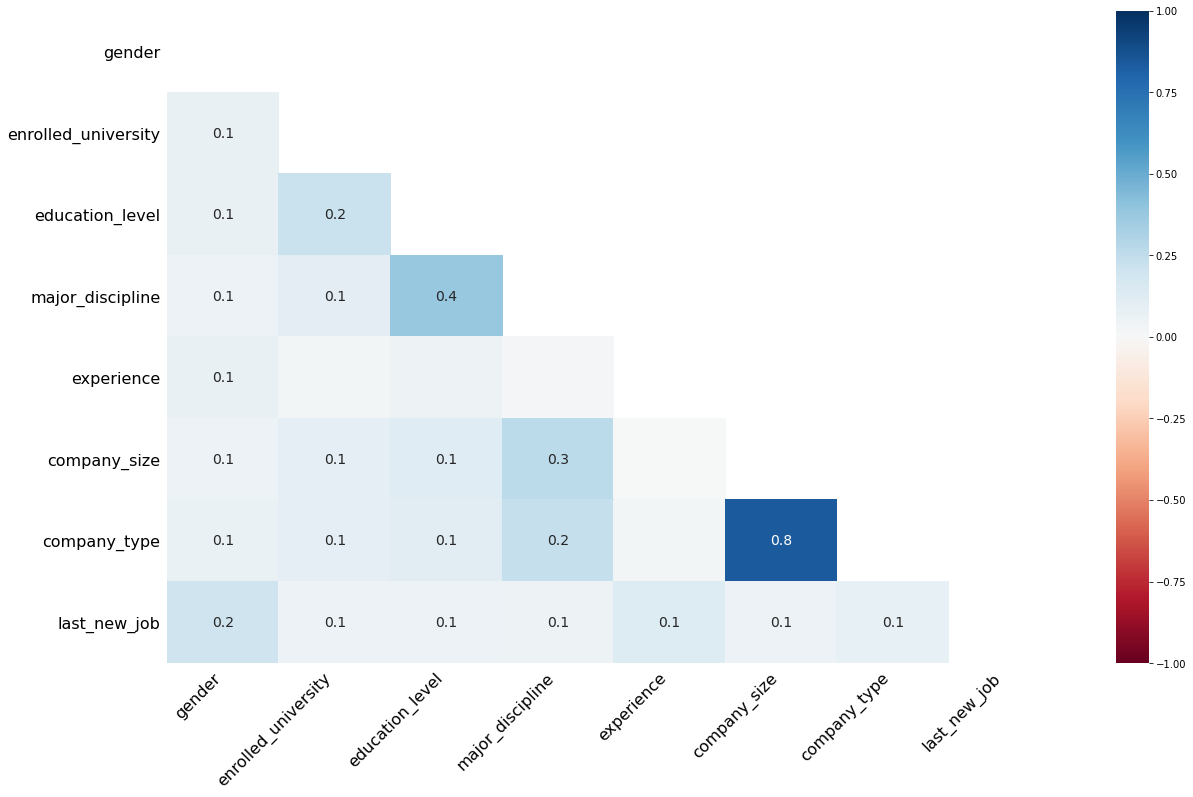

In [12]:
msno.heatmap(hrdf)

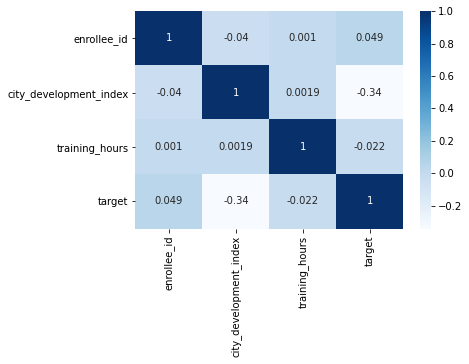

In [13]:
sns.heatmap(data=hrdf.corr(),annot=True,cmap='Blues')



> Histograms for all numeric variables in subplots



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbcdae2b90>,
      dtype=object)

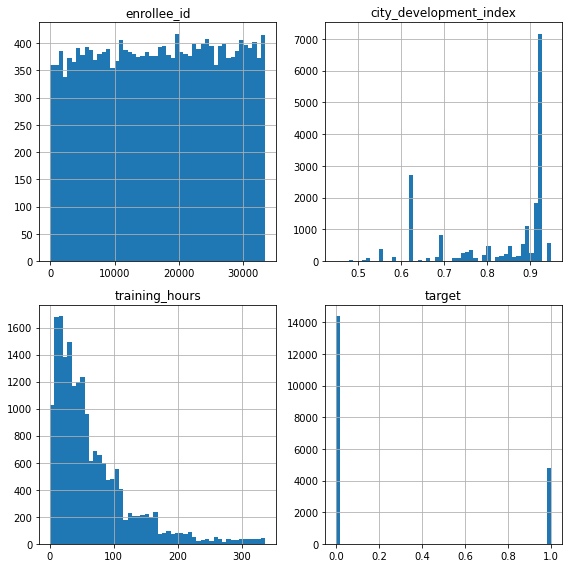

In [14]:
hrdf.hist(bins=50, figsize=(8,8))
plt.tight_layout()
plt.show()

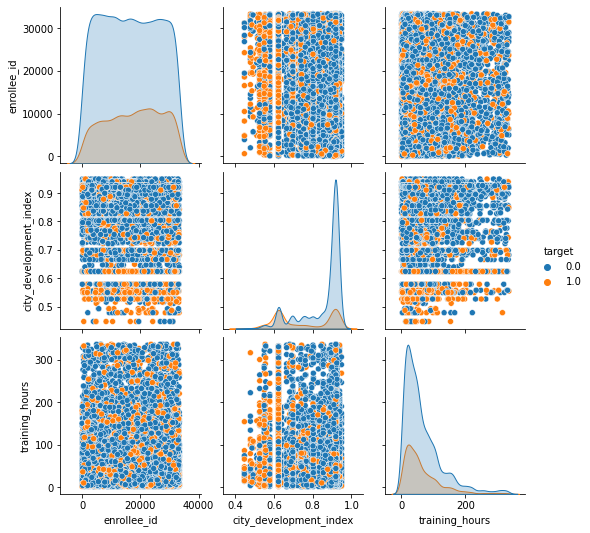

In [15]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None) 

sns.pairplot(hrdf, hue = 'target') #we can take this out if not necessary but we need to drop enrolee_id



> Target variable is analyzed and visualized.



In [16]:
hrdf.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

Text(0.5, 1.0, ' Number of people who will leave or not ')

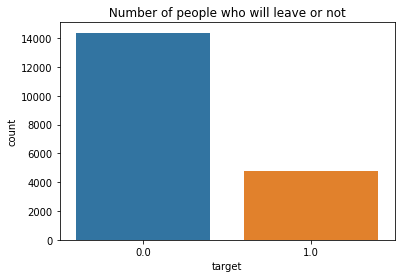

In [17]:
sns.countplot(hrdf.target)
plt.title(" Number of people who will leave or not " )
plt.show()



> variable : enrollee_id



In [18]:
hrdf.enrollee_id.value_counts()

2047     1
2692     1
4743     1
27272    1
25225    1
        ..
17682    1
19731    1
29972    1
25878    1
6147     1
Name: enrollee_id, Length: 19158, dtype: int64



> variable : City



In [19]:
hrdf.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_111       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

In [20]:
hrdf.city.nunique()

123



> variable : City development index



In [21]:
hrdf.city_development_index.value_counts()

0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [22]:
hrdf.city_development_index.nunique()

93

<Figure size 720x432 with 0 Axes>

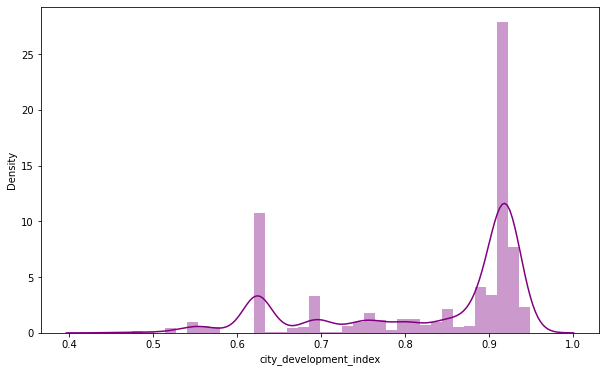

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(hrdf.city_development_index , color= 'purple')



> Variable : Gender



In [24]:
hrdf.gender.value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

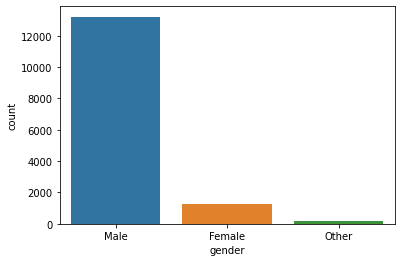

In [25]:
sns.countplot(hrdf.gender)
plt.show()

Text(0.5, 1.0, 'The gender who will leave or stay ')

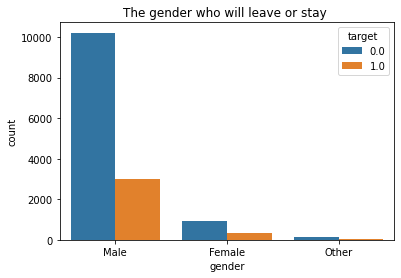

In [26]:
sns.countplot(hrdf.gender, hue = hrdf.target)
plt.title('The gender who will leave or stay ')
plt.show()



> variable: Relevant experience



In [27]:
hrdf.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

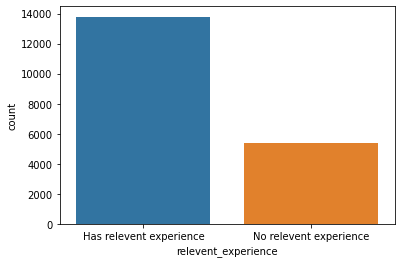

In [28]:
sns.countplot(hrdf.relevent_experience)
plt.show()

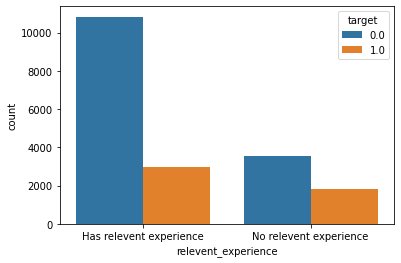

In [29]:
sns.countplot(hrdf.relevent_experience, hue = hrdf.target)
plt.show()



> varible : Enrolled university



In [30]:
hrdf.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

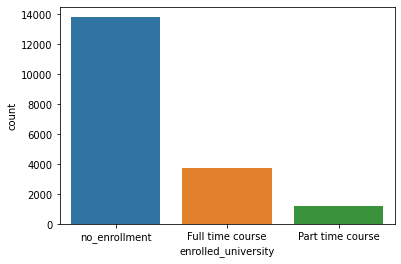

In [31]:
sns.countplot(hrdf.enrolled_university)
plt.show()

Text(0.5, 1.0, ' Type of Enrollment ')

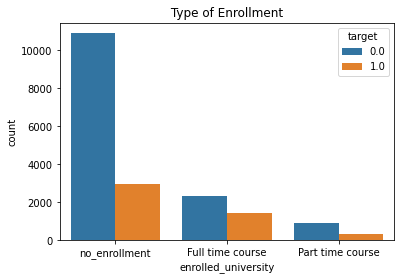

In [32]:
sns.countplot(hrdf.enrolled_university, hue = hrdf.target)
plt.title(' Type of Enrollment ')
plt.show()



> variable : Education level



In [33]:
hrdf.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

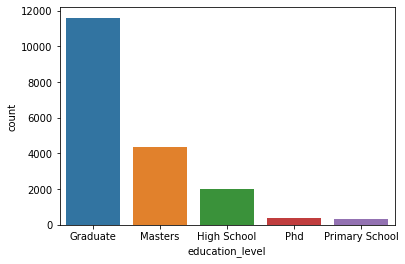

In [34]:
sns.countplot(hrdf.education_level)
plt.show()

Text(0.5, 1.0, ' Eductaion Level ')

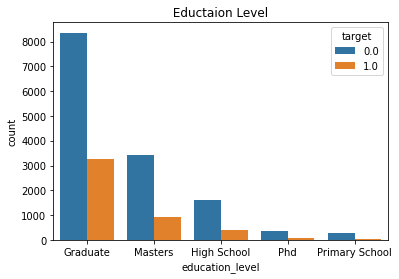

In [35]:
sns.countplot(hrdf.education_level, hue = hrdf.target)
plt.title(' Eductaion Level ')
plt.show()



> varaible : major discipline



In [36]:
hrdf.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [37]:
hrdf.major_discipline.fillna(method='ffill',inplace=True) 

In [38]:
hrdf.major_discipline.isna().sum().sum()

0

In [39]:
hrdf.major_discipline.value_counts()

STEM               16992
Humanities           777
Other                448
Business Degree      387
Arts                 293
No Major             261
Name: major_discipline, dtype: int64

<Figure size 720x360 with 0 Axes>

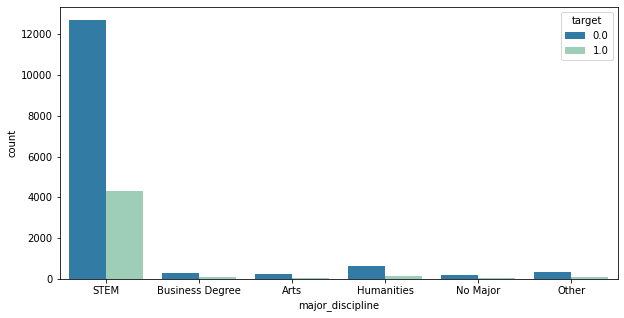

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(hrdf.major_discipline,hue=hrdf.target,palette='YlGnBu_r')



> variable : experience



In [41]:
hrdf.experience.value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [42]:
hrdf.experience.nunique()

22

<Figure size 720x360 with 0 Axes>

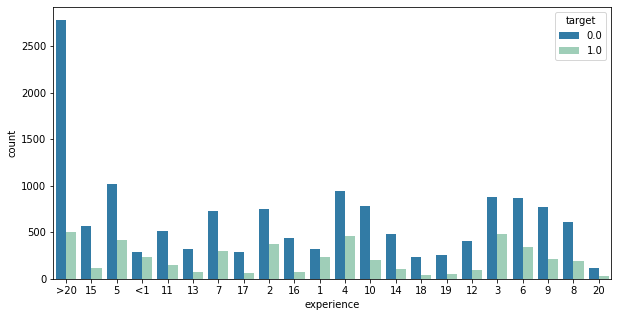

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(hrdf.experience,hue=hrdf.target,palette='YlGnBu_r')



> Variable : company size



In [44]:
hrdf.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

<Figure size 720x360 with 0 Axes>

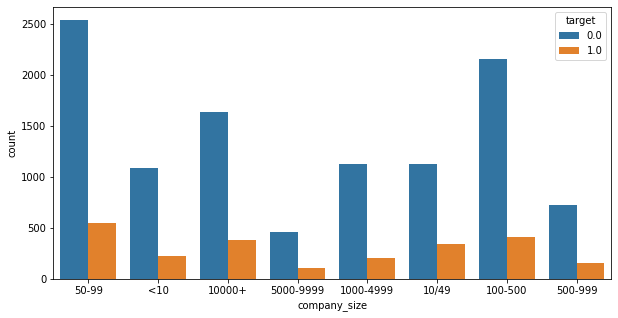

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(hrdf.company_size, hue = hrdf.target)
plt.show()



> variable : company type



In [46]:
hrdf.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

<Figure size 720x360 with 0 Axes>

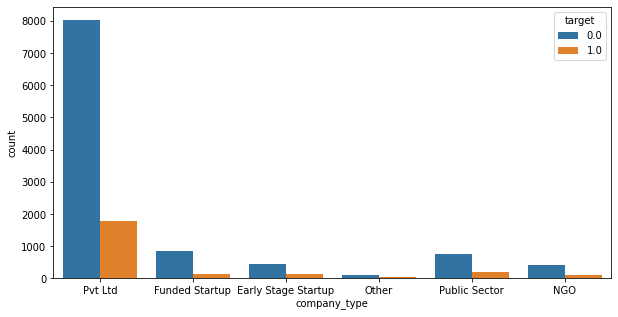

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(hrdf.company_type, hue = hrdf.target)
plt.show()



> variable : last_new_job



In [48]:
hrdf.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

<Figure size 720x360 with 0 Axes>

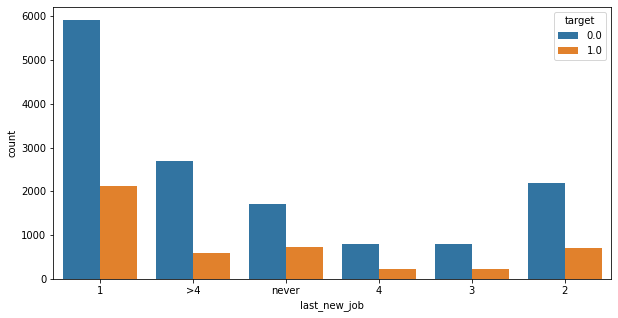

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(hrdf.last_new_job, hue = hrdf.target)
plt.show()



> variable : Training hours



In [50]:
hrdf.training_hours.value_counts()

28     329
12     292
18     291
22     282
50     279
      ... 
266      6
272      5
234      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

<Figure size 720x432 with 0 Axes>

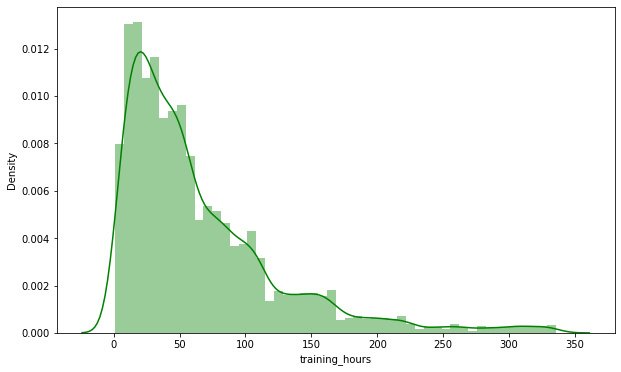

In [51]:
plt.figure(figsize=(10,6))
sns.distplot(hrdf['training_hours'], color= 'green')

#Outlier Detection







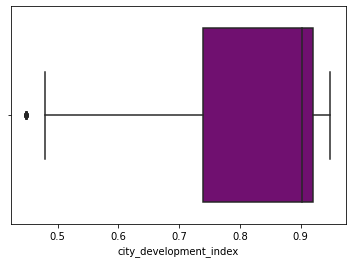

In [52]:
ax=sns.boxplot(hrdf.city_development_index, color= 'purple')

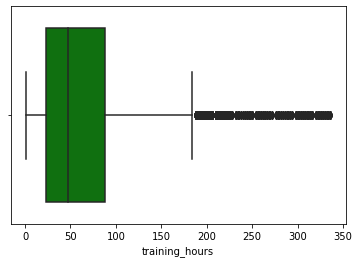

In [53]:
ax= sns.boxplot(hrdf.training_hours, color= 'green')

In [54]:
#ax=sns.boxplot(hrdf.experience) #it's a categorical variable 

In [55]:
#hrencdf.drop(['enrollee_id', 'city'],inplace=True,axis=1)
#hrencdf.head()

# Data Preprocessing



> Imputing the missing value with the mode because the variables are categorical.



In [56]:
hrdf.fillna(hrdf.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [57]:
hrdf.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [58]:
hrdf_t = hrdf.copy()

In [59]:
hrdf_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [60]:
hrdf_t.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64





 

> Company size column transformation : The number of values and some categories are transformed as the avearge number of the employees in the company.



In [61]:
hrdf_t['company_size'] = hrdf_t['company_size'].replace(['<10','10/49','<50','50-99'],50) #company size is measured by the average number of employees

In [62]:
hrdf_t['company_size'] = hrdf_t['company_size'].replace(['100-500','500-999'],550)

In [63]:
hrdf_t['company_size'] = hrdf_t['company_size'].replace(['1000-4999'],3000)

In [64]:
hrdf_t['company_size'] = hrdf_t['company_size'].replace(['5000-9999'],7000)

In [65]:
hrdf_t['company_size'] = hrdf_t['company_size'].replace(['10000+'],10000)

In [66]:
hrdf_t.company_size.value_counts()

50       11800
550       3448
10000     2019
3000      1328
7000       563
Name: company_size, dtype: int64



> One hot encoding is applied for company size.



In [67]:

encoder=OneHotEncoder(sparse=False)

company_size_encoded = pd.DataFrame (encoder.fit_transform(hrdf_t[['company_size']]))

In [68]:
company_size_encoded.columns = encoder.get_feature_names(['company_size'])

hrdf_t.drop(['company_size'] ,axis=1, inplace=True)

hrencdf= pd.concat([hrdf_t, company_size_encoded ], axis=1)

 

> Company type column transformation : NGO and OTHER are merged into a new category and one hot encoding is applied.


In [69]:
hrdf_t['company_type'] = hrdf_t['company_type'].replace(['NGO','Other',],'NGO & Other')

In [70]:

encoder=OneHotEncoder(sparse=False)

company_type_encoded = pd.DataFrame (encoder.fit_transform(hrdf_t[['company_type']]))

In [71]:
company_type_encoded.columns = encoder.get_feature_names(['company_type'])

hrencdf.drop(['company_type'] ,axis=1, inplace=True)

hrencdf= pd.concat([hrencdf, company_type_encoded ], axis=1)

In [72]:
major_discipline_encoded = pd.DataFrame (encoder.fit_transform(hrdf_t[['major_discipline']]))

In [73]:
major_discipline_encoded.columns = encoder.get_feature_names(['major_discipline'])

hrencdf.drop(['major_discipline'] ,axis=1, inplace=True)

hrencdf= pd.concat([hrencdf, major_discipline_encoded ], axis=1)




> Gender column transformation : one hot encoding applied to the categories.



In [74]:
gender_encoded = pd.DataFrame (encoder.fit_transform(hrdf_t[['gender']]))

In [75]:
gender_encoded.columns = encoder.get_feature_names(['gender'])

hrencdf.drop(['gender'] ,axis=1, inplace=True)

hrencdf= pd.concat([hrencdf, gender_encoded ], axis=1)

 


>  Education level - column transformation : Education level is recoded as 0,1,2,3 .






In [76]:
hrencdf = hrencdf.replace({'Graduate':1})

In [77]:
hrencdf = hrencdf.replace({'Masters':2})

In [78]:
hrencdf = hrencdf.replace({'Phd':3})

In [79]:
hrencdf = hrencdf.replace({'Primary School':0})

In [80]:
hrencdf = hrencdf.replace({'High School':0})




> enrolled university column transformation : The column is recoded into 0,1,2.



In [81]:
hrencdf = hrencdf.replace({'no_enrollment':0})

In [82]:
hrencdf = hrencdf.replace({'Full time course':1})

In [83]:
hrencdf = hrencdf.replace({'Part time course':1})




> last new job column transformation : This column has numbers but in string format. some values included ">" and "<" symbols. We replaced the symbols with white space and changed the datatype of entire column into integer.



In [84]:
hrencdf['last_new_job'] = hrencdf['last_new_job'].replace(['never'],0)

In [85]:
hrencdf = hrencdf.replace({'never':0})

In [86]:
hrencdf['last_new_job'] = hrencdf['last_new_job'].replace(['>4'],5)

In [87]:
hrencdf = hrencdf.replace({'>4':5})

In [88]:
hrencdf["last_new_job"] = pd.to_numeric(hrencdf["last_new_job"])

In [89]:
hrencdf['experience'] = hrencdf['experience'].replace(['>20'],21)

In [90]:
hrencdf['experience'] = hrencdf['experience'].replace(['<1'],0)

In [91]:
hrencdf["experience"] = hrencdf["experience"].apply(pd.to_numeric)



> Relevent experince column transformation : The categories have relevent experrince and no experince are binary coded into 0's and 1's.



In [92]:
hrencdf = hrencdf.replace({'Has relevent experience':1})

In [93]:
hrencdf = hrencdf.replace({'No relevent experience':0})



> City column has alphanumeric values. We extracted the numeric part using reg expressions and converted the datatype into integer.



In [94]:
citylist = hrencdf.city.to_list()

In [95]:
hrencdf['city'] = hrencdf['city'].str.replace(r'\D+', '').astype('int')



> Final glimpse of our transformed dataframe before modelling.



In [96]:
hrencdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   enrollee_id                       19158 non-null  int64  
 1   city                              19158 non-null  int64  
 2   city_development_index            19158 non-null  float64
 3   relevent_experience               19158 non-null  int64  
 4   enrolled_university               19158 non-null  int64  
 5   education_level                   19158 non-null  int64  
 6   experience                        19158 non-null  int64  
 7   last_new_job                      19158 non-null  int64  
 8   training_hours                    19158 non-null  int64  
 9   target                            19158 non-null  float64
 10  company_size_50                   19158 non-null  float64
 11  company_size_550                  19158 non-null  float64
 12  comp

#Feature Scaling

#Balance the Target Variable



> Target variable is imbalanced. Number of records in one of the categories of the target variable. we downsampled the category that has more number of records so that both the categories have the balanced records.



In [97]:
hrencdf.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [98]:
hrencdf_zero = hrencdf[hrencdf['target'] == 0.0]

In [99]:
hrencdf_zero.drop('enrollee_id', axis=1, inplace=True)

In [100]:
hrencdf_zero.head(5)

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,company_size_50,company_size_550,company_size_3000,company_size_7000,company_size_10000,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO & Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
1,40,0.776,0,0,1,15,5,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21,0.624,0,1,1,5,0,83,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,162,0.767,1,0,2,21,4,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,160,0.920,1,0,0,5,1,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,103,0.920,1,0,1,17,5,123,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [101]:
hrencdf_zero.shape

(14381, 28)

In [102]:
hrencdf_one = hrencdf[hrencdf['target'] != 0.0]

In [103]:
hrencdf_one.drop('enrollee_id', axis=1, inplace=True)

In [104]:
hrencdf_one.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,company_size_50,company_size_550,company_size_3000,company_size_7000,company_size_10000,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO & Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
0,103,0.920,1,0,1,21,1,36,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,115,0.789,0,0,1,0,0,52,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,176,0.764,1,1,1,11,1,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,46,0.762,1,0,1,13,5,18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8,103,0.920,1,0,1,7,1,46,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [105]:
hrencdf_one.shape

(4777, 28)

In [106]:

hrencdf_zero_downsampled = resample(hrencdf_zero ,replace=False,n_samples=5000,random_state=123)
hrencdf_zero_downsampled.shape                       

(5000, 28)

In [107]:
hrencdf_sampled = pd.concat([hrencdf_one,hrencdf_zero_downsampled],ignore_index=True)

In [108]:
hrencdf_sampled.shape

(9777, 28)

In [109]:
hrencdf_sampled.head()

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,company_size_50,company_size_550,company_size_3000,company_size_7000,company_size_10000,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO & Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
0,103,0.920,1,0,1,21,1,36,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,115,0.789,0,0,1,0,0,52,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,176,0.764,1,1,1,11,1,24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,46,0.762,1,0,1,13,5,18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,103,0.920,1,0,1,7,1,46,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [110]:
y=hrencdf_sampled['target']
X=hrencdf_sampled.drop('target',axis=1)



> The data split into train and test data.






In [111]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      city  city_development_index  relevent_experience  enrolled_university  \
1448    99                   0.915                    1                    0   
9269    61                   0.913                    1                    0   
7972   100                   0.887                    0                    1   
8571   103                   0.920                    0                    1   
4510    21                   0.624                    1                    0   
...    ...                     ...                  ...                  ...   
7382    75                   0.939                    0                    0   
7763   114                   0.926                    1                    0   
5218    21                   0.624                    1                    1   
1346    21                   0.624                    0                    1   
3582    21                   0.624                    0                    0   

      education_level  experience  last



> Min-Max scaling is performed on Xtrain and Xtest.



In [112]:

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
Xtrain_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
Xtest_norm = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
Xtrain_norm.head()
Xtest_norm.head()



,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,company_size_50,company_size_550,company_size_3000,company_size_7000,company_size_10000,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO & Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
0,0.547486,0.932136,1.0,0.0,0.333333,0.190476,0.4,0.134328,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.335196,0.928144,1.0,0.0,0.666667,1.000000,1.0,0.423881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.553073,0.876248,0.0,1.0,0.333333,0.238095,0.0,0.038806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.569832,0.942116,0.0,1.0,0.666667,0.238095,0.6,0.056716,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.111732,0.351297,1.0,0.0,0.333333,1.000000,0.2,0.540299,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,company_size_50,company_size_550,company_size_3000,company_size_7000,company_size_10000,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO & Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
0,0.804469,0.213573,1.0,0.0,0.333333,0.095238,0.2,0.254491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.368715,0.812375,0.0,1.0,0.000000,0.142857,0.0,0.035928,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.927374,0.944112,1.0,1.0,0.333333,0.238095,0.2,0.916168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.754190,0.896208,0.0,1.0,0.333333,0.285714,0.2,0.044910,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.111732,0.351297,1.0,1.0,0.333333,0.285714,0.2,0.092814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [113]:
hr_logreg = LogisticRegression()
hr_logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Data Modelling



> Logistic Regression module is imported from the sklearn package and the model is trained and tested. The results : Classification report, Confusion Matrix and accuracy score are printed.



In [114]:
hr_logreg.fit(Xtrain_norm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
pred = hr_logreg.predict(Xtest_norm)
pred

array([1., 1., 0., ..., 0., 0., 1.])

In [116]:
pred_score = hr_logreg.score(Xtest_norm, y_test)
pred_score

0.6835378323108384

In [117]:
print("Classification report:\n", classification_report(y_test,pred))

print("Confusion Matrix:\n", confusion_matrix(y_test,pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       997
         1.0       0.70      0.61      0.66       959

    accuracy                           0.68      1956
   macro avg       0.69      0.68      0.68      1956
weighted avg       0.69      0.68      0.68      1956

Confusion Matrix:
 [[748 249]
 [370 589]]




> Logit model is implemented using statistical package and the summary is printed. The summary reults include coefficients of the variables and p-values of the the variables. 



In [118]:
model = sm.Logit(y, X)

In [119]:
result = model.fit(method='newton')
result.summary()

         Current function value: 0.598664
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 9777
Model:                          Logit   Df Residuals:                     9753
Method:                           MLE   Df Model:                           23
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:                  0.1360
Time:                        01:08:18   Log-Likelihood:                -5853.1
converged:                      False   LL-Null:                       -6774.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
city                                -0.0002      0.001     -0.346      0.729      -0.001       0.001
city_development_index              -5.9142      0.211    -27.976      0.000      -6.329      -5.500
relevent_experience                 -0.3519      0.055     -6.384      0.000      -0.460      -0.244
enrolled_university                  0.2545      0.054      4.684      0.000       0.148       0.361
education_level                      0.1693      0.039      4.387      0.000       0.094       0.245
experience                          -0.0132      0.004     -3.093      0.002      -0.022      -0.005
last_new_job                         0.0675      0.016      4.212      0.000       0.036       0.099
training_hours                      -0.0008      0.000     -2.133      0.033      -0.002   -6.54e-05
company_size_50                      1.5344        nan        nan        nan         nan         nan
company_size_550                     0.8223        nan        nan        nan         nan         nan
company_size_3000                    0.7093        nan        nan        nan         nan         nan
company_size_7000                    0.9656        nan        nan        nan         nan         nan
company_size_10000                   0.9164        nan        nan        nan         nan         nan
company_type_Early Stage Startup     0.6621        nan        nan        nan         nan         nan
company_type_Funded Startup          0.6000        nan        nan        nan         nan         nan
company_type_NGO & Other             1.0798        nan        nan        nan         nan         nan
company_type_Public Sector           1.3576        nan        nan        nan         nan         nan
company_type_Pvt Ltd                 1.2839        nan        nan        nan         nan         nan
major_discipline_Arts                1.0101        nan        nan        nan         nan         nan
major_discipline_Business Degree     0.9637        nan        nan        nan         nan         nan
major_discipline_Humanities          0.8902        nan        nan        nan         nan         nan
major_discipline_No Major            0.7630        nan        nan        nan         nan         nan
major_discipline_Other               0.6034        nan        nan        nan         nan         nan
major_discipline_STEM                0.7353        nan        nan        nan         nan         nan
gender_Female                        1.7049        nan        nan        nan         nan         nan
gender_Male                          1.4797        nan        nan        nan         nan         nan
gender_Other                         1.7810        nan        nan        nan         nan         nan
====================================================================================================
"""

In [120]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.136     
Dependent Variable:       target                AIC:                   11754.2718
Date:                     2021-04-30 01:08      BIC:                   11926.7787
No. Observations:         9777                  Log-Likelihood:        -5853.1   
Df Model:                 23                    LL-Null:               -6774.4   
Df Residuals:             9753                  LLR p-value:           0.0000    
Converged:                0.0000                Scale:                 1.0000    
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------
city                             -0.0002   0.0005  -0.3461 0.7293 -0.0012  0.0009
city_development_index           -5.9142   0.2114 -27.9757 0.0000 -6.3285 -5.4999
relevent_experience              -0.3519   0.0551  -6.3837 0.0000 -0.4599 -0.2439
enrolled_university               0.2545   0.0543   4.6844 0.0000  0.1480  0.3610
education_level                   0.1693   0.0386   4.3866 0.0000  0.0937  0.2450
experience                       -0.0132   0.0043  -3.0932 0.0020 -0.0216 -0.0048
last_new_job                      0.0675   0.0160   4.2118 0.0000  0.0361  0.0989
training_hours                   -0.0008   0.0004  -2.1332 0.0329 -0.0015 -0.0001
company_size_50                   1.5344      nan      nan    nan     nan     nan
company_size_550                  0.8223      nan      nan    nan     nan     nan
company_size_3000                 0.7093      nan      nan    nan     nan     nan
company_size_7000                 0.9656      nan      nan    nan     nan     nan
company_size_10000                0.9164      nan      nan    nan     nan     nan
company_type_Early Stage Startup  0.6621      nan      nan    nan     nan     nan
company_type_Funded Startup       0.6000      nan      nan    nan     nan     nan
company_type_NGO & Other          1.0798      nan      nan    nan     nan     nan
company_type_Public Sector        1.3576      nan      nan    nan     nan     nan
company_type_Pvt Ltd              1.2839      nan      nan    nan     nan     nan
major_discipline_Arts             1.0101      nan      nan    nan     nan     nan
major_discipline_Business Degree  0.9637      nan      nan    nan     nan     nan
major_discipline_Humanities       0.8902      nan      nan    nan     nan     nan
major_discipline_No Major         0.7630      nan      nan    nan     nan     nan
major_discipline_Other            0.6034      nan      nan    nan     nan     nan
major_discipline_STEM             0.7353      nan      nan    nan     nan     nan
gender_Female                     1.7049      nan      nan    nan     nan     nan
gender_Male                       1.4797      nan      nan    nan     nan     nan
gender_Other                      1.7810      nan      nan    nan     nan     nan
=================================================================================

"""

# Neural Networks



> Neural networks with 6 dense layers are implemented and optimized with Adam Optimizer.



In [121]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(27,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(Xtrain_norm, y_train,epochs=50, batch_size=32, verbose=1) #validation_data=(X_val, Y_val))

Epoch 1/50
245/245 [==============================] - 1s 910us/step - loss: 0.6903 - accuracy: 0.5331
Epoch 2/50
245/245 [==============================] - 0s 793us/step - loss: 0.6394 - accuracy: 0.6636
Epoch 3/50
245/245 [==============================] - 0s 874us/step - loss: 0.6089 - accuracy: 0.6909
Epoch 4/50
245/245 [==============================] - 0s 945us/step - loss: 0.5998 - accuracy: 0.6903
Epoch 5/50
245/245 [==============================] - 0s 876us/step - loss: 0.5939 - accuracy: 0.6929
Epoch 6/50
245/245 [==============================] - 0s 804us/step - loss: 0.5962 - accuracy: 0.6908
Epoch 7/50
245/245 [==============================] - 0s 879us/step - loss: 0.5930 - accuracy: 0.6960
Epoch 8/50
245/245 [==============================] - 0s 897us/step - loss: 0.5870 - accuracy: 0.6964
Epoch 9/50
245/245 [==============================] - 0s 936us/step - loss: 0.5845 - accuracy: 0.6990
Epoch 10/50
245/245 [==============================] - 0s 926us/step - loss: 0.587

In [122]:
y_pred = model.predict(Xtest_norm)

score = model.evaluate(Xtest_norm, y_test,verbose=1)
print(y_pred)
y_pred.shape
print(score)

62/62 [==============================] - 0s 724us/step - loss: 0.5894 - accuracy: 0.7009
[[0.8027561 ]
 [0.6817901 ]
 [0.5602054 ]
 ...
 [0.34797058]
 [0.21629032]
 [0.82604206]]


(1956, 1)

[0.5894407629966736, 0.7009202241897583]


In [123]:
optimizer = tf.optimizers.Adam()

#The loss is the mean square error and the metric used is the mean absolute error
model.compile(loss='mse',
             optimizer = optimizer,
             metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 521
Trainable params: 521
Non-trainable params: 0
__________________________________________________________